In [2]:
import numpy as np
import os
import tensorflow as tf
from tqdm import tqdm
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap


In [4]:
import pandas as pd

image_path = r"D:/DataScience/CaptionGeneration/Images"
data = pd.read_csv(r"D:/DataScience/CaptionGeneration/captions.txt")
data.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [6]:
def text_preprocessing(data):
    data['caption'] = data['caption'].apply(lambda x:x.lower())
    data['caption'] = data['caption'].apply(lambda x:x.replace(r"[^A-Za-z]",""))
    data['caption'] = data['caption'].apply(lambda x:x.replace(r"\s+"," "))
    data['caption'] = data['caption'].apply(lambda x: " ".join([word for word in x.split() if len(word)>1]))
    data['caption'] = "startseq "+data['caption']+" endseq"
    
    return data
    
data = text_preprocessing(data)
captions = data['caption'].tolist()
captions[:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

In [8]:
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions)
vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(caption.split()) for caption in captions)

images = data['image'].unique().tolist()
nimages = len(images)

split_index = round(0.85*nimages)
train_images = images[:split_index]
val_images = images[split_index:]

train = data[data['image'].isin(train_images)]
test = data[data['image'].isin(val_images)]

train.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)

tokenizer.texts_to_sequences([captions[1]])[0]

[1, 18, 315, 63, 195, 116, 2]

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from tensorflow.keras. preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import pickle

model_path = "D:/DataScience/CaptionGeneration/Dump/model.keras"
tokenizer_path = "D:/DataScience/CaptionGeneration/Dump/tokenizer.pkl"
feature_extractor_path = "D:/DataScience/CaptionGeneration/Dump/feature_extractor.keras"

def GenCaption(image_path, model_path, tokenizer_path, features_extractor_path, max_length=34, img_size=224):
    caption_model = load_model(model_path)
    feature_extractor = load_model(feature_extractor_path)
    tokenizer = pickle.load(open("tokenizer.pkl",'rb'))
    img = load_img(image_path, target_size=(img_size,img_size))
    img = img_to_array(img)/255
    img = np.expand_dims(img,axis=0)
    image_feature = feature_extractor.predict(img, verbose=0)
    in_text = "startseq"
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = caption_model.predict([image_feature, sequence])
        yhat_index = np.argmax(yhat)
        word = tokenizer.index_word.get(yhat_index, None)
        if word is None:
            break
        in_text += " "+ word
        if word == 'endseq':
            break
    caption = in_text.replace('startseq','').replace('endseq','').strip()

    img = load_img(image_path, target_size=(img_size,img_size))
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.axis('off')
    plt.title(caption, fontsize=16, color='black')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


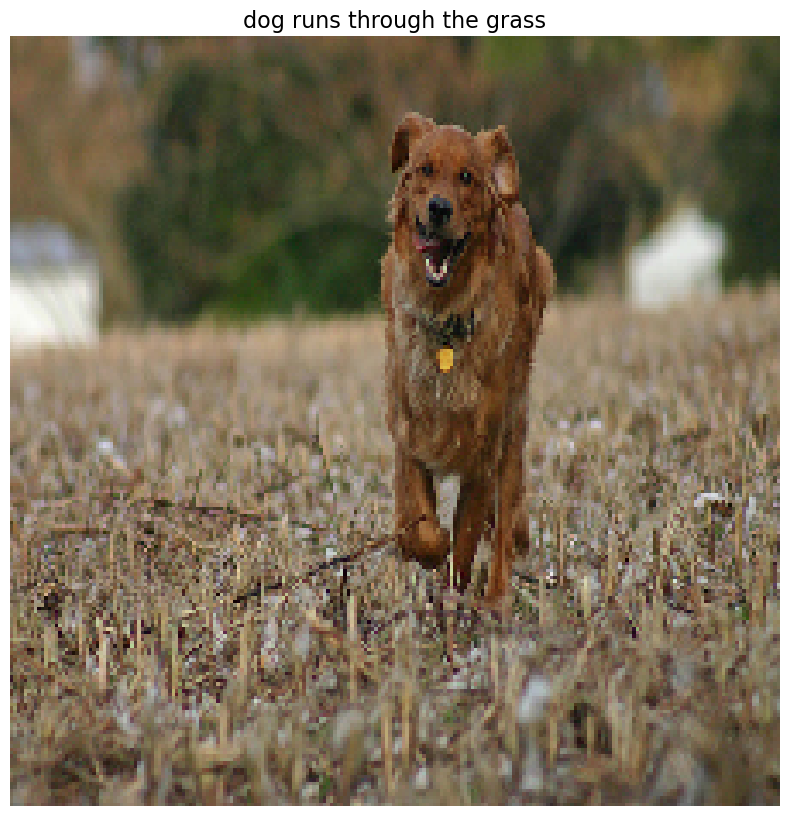

In [4]:
image_path = "D:/DataScience/CaptionGeneration/Images/69189650_6687da7280.jpg"
GenCaption(image_path, model_path, tokenizer_path, feature_extractor_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


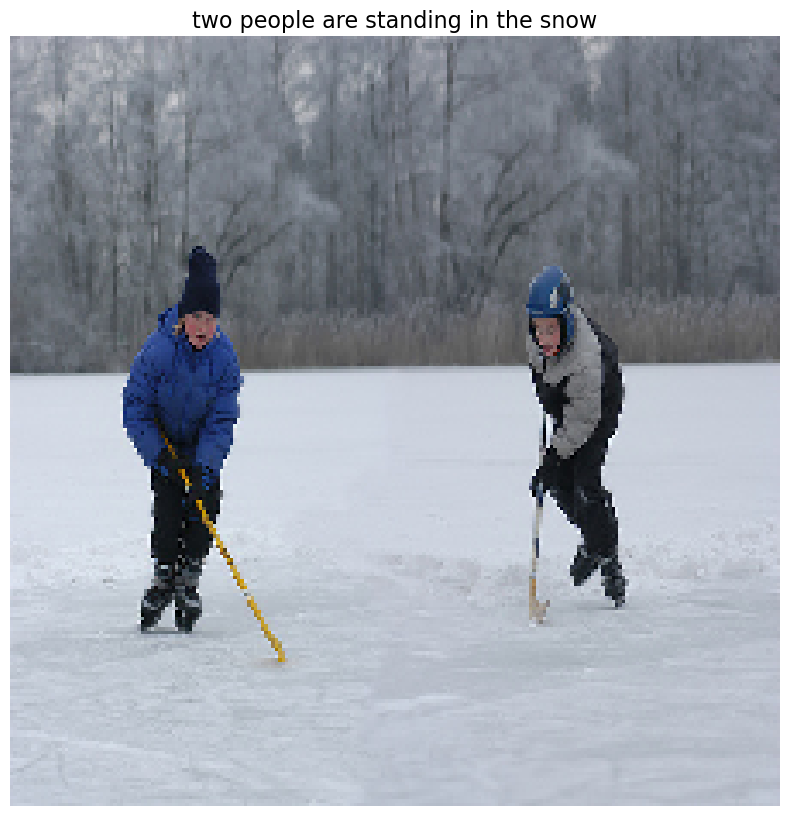

In [22]:
image_path = "D:/DataScience/CaptionGeneration/Images/86542183_5e312ae4d4.jpg"
GenCaption(image_path, model_path, tokenizer_path, feature_extractor_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


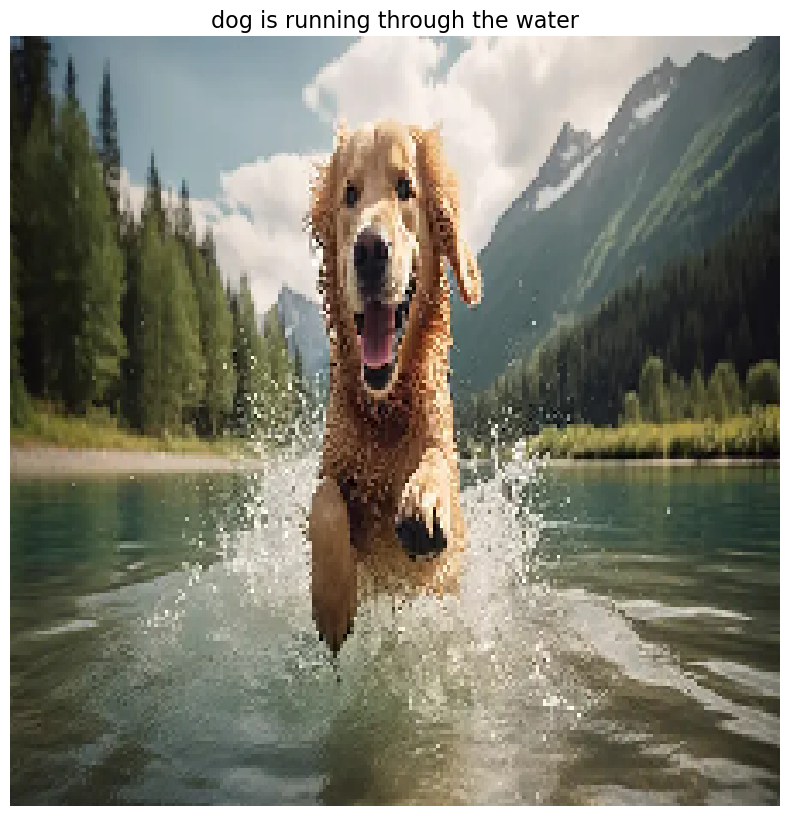

In [16]:
image_path = "D:/DataScience/Movement/happydawg.webp"
GenCaption(image_path, model_path, tokenizer_path, feature_extractor_path)